<a href="https://colab.research.google.com/github/Kzis/decision-tree/blob/master/dicision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn import metrics
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [2]:
# load dataset
data = load_wine()

df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [0]:

# feature matrix
X = data.data

# target vector
y = data.target

# class labels
labels = data.feature_names

In [0]:

# print dataset description
print(data.DESCR)

In [0]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [0]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=None)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_score = clf.score(X,y)

In [0]:
# https://scikit-learn.org/stable/modules/classes.html#classification-metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("-"*5)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score
print("Precision None:",metrics.precision_score(y_test, y_pred, average=None)  ) 
print("Precision Macro:",metrics.precision_score(y_test, y_pred, average='macro')  ) 
print("Precision Micro:",metrics.precision_score(y_test, y_pred, average='micro')  ) 
print("Precision Weighted:",metrics.precision_score(y_test, y_pred, average='weighted')  ) 


print("-"*5)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
print("Recall None:",metrics.recall_score(y_test, y_pred,average=None)) 
print("Recall Macro:",metrics.recall_score(y_test, y_pred,average='macro'))
print("Recall Micro:",metrics.recall_score(y_test, y_pred,average='micro'))
print("Recall Weighted:",metrics.recall_score(y_test, y_pred,average='weighted')) 


print("-"*5)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
print("F1 None:",metrics.f1_score(y_test, y_pred,average=None)) 
print("F1 Macro:",metrics.f1_score(y_test, y_pred,average='macro'))
print("F1 Micro:",metrics.f1_score(y_test, y_pred,average='micro'))
print("F1 Weighted:",metrics.f1_score(y_test, y_pred,average='weighted')) 




Accuracy: 0.9444444444444444
-----
Precision None: [0.95652174 0.9        1.        ]
Precision Macro: 0.9521739130434783
Precision Micro: 0.9444444444444444
Precision Weighted: 0.9462962962962963
-----
Recall None: [0.95652174 0.94736842 0.91666667]
Recall Macro: 0.940185608949911
Recall Micro: 0.9444444444444444
Recall Weighted: 0.9444444444444444
-----
F1 None: [0.95652174 0.92307692 0.95652174]
F1 Macro: 0.9453734671125975
F1 Micro: 0.9444444444444444
F1 Weighted: 0.9447541186671622


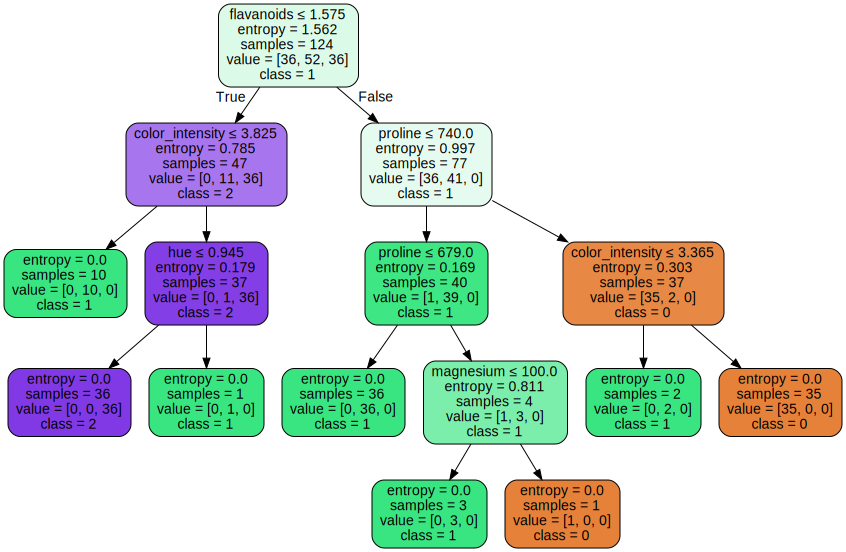

In [6]:
graph = Source(export_graphviz(clf, out_file=None,  
                filled=True, rounded=True,
                special_characters=True,feature_names = labels,class_names=['0','1','2']))

display(SVG(graph.pipe(format='svg')))

In [0]:
from sklearn.preprocessing import label_binarize
y = label_binarize(y, classes=[0, 1, 2])
from sklearn.multiclass import OneVsRestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=1)
clf = OneVsRestClassifier(DecisionTreeClassifier(criterion="entropy", max_depth=None))
y_score = clf.fit(X_train, y_train).predict_proba(X_test)

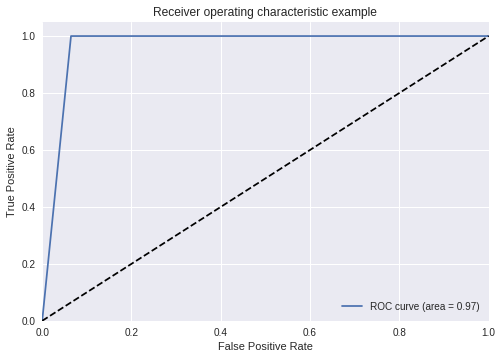

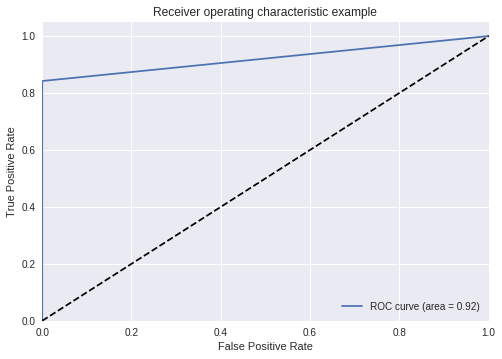

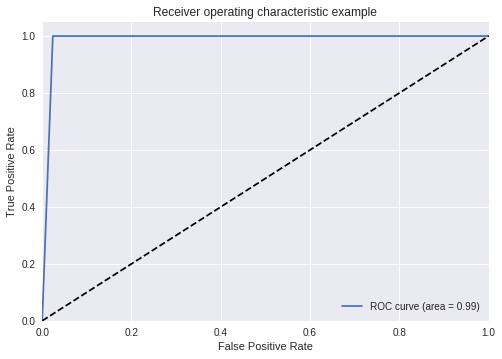

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [0]:
?roc_curve